# Bhushan Subhash More

# Environment Setup and Library Imports
In this section, I initialize the programming environment by importing the necessary Python libraries for data manipulation, statistical visualization, and machine learning preprocessing. These libraries are essential for building the leakage-aware pipeline and performing the exploratory data analysis required for this assignment.
- **Pandas & NumPy**: Used for structural data handling and mathematical operations.
- **Matplotlib & Seaborn**: Used to generate the required EDA plots on the training data.
- **Scikit-Learn**: Used for data partitioning (train/test split) and constructing the automated preprocessing pipeline.

In [11]:
# Import pandas for data manipulation and reading CSV files
import pandas as pd

# Import numpy for high-level mathematical functions and array operations
import numpy as np

# Import matplotlib.pyplot for creating basic static visualizations 
import matplotlib.pyplot as plt

# Import seaborn for advanced statistical data visualization and better aesthetics
import seaborn as sns

# Import train_test_split to partition the data into training and testing sets to prevent leakage
from sklearn.model_selection import train_test_split

# Import SimpleImputer to handle missing values by filling them with specific strategies (median/most frequent)
from sklearn.impute import SimpleImputer

# Import OneHotEncoder to convert categorical text data into a binary numeric format
from sklearn.preprocessing import OneHotEncoder

# Import ColumnTransformer to apply different preprocessing steps to specific columns simultaneously
from sklearn.compose import ColumnTransformer

# Import Pipeline to bundle preprocessing steps together for a cleaner, reproducible workflow
from sklearn.pipeline import Pipeline

# Load the required shopping behavior dataset into a pandas DataFrame
df = pd.read_csv('shopping_behavior_v2.csv')

# PRE-PROCESSING: Convert invalid values to NaN so SimpleImputer can work
# This fixes the professor's note that "imputation doesn’t fix invalid negatives unless you first convert them to NaN"
df.loc[df['Purchase Amount (USD)'] < 0, 'Purchase Amount (USD)'] = np.nan
df.loc[df['Previous Purchases'] < 0, 'Previous Purchases'] = np.nan

# Display the first few rows to verify the data loaded correctly
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,12,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,NaN,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,0.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,NaN,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,NaN,M,Turquoise,Spring,2.7,Yes,Free Shipping,NaN,Yes,NaN,PayPal,Annually


# 2) Problem Statement and Success Metrics 
- **Problem Statement** : In this assignment, I am performing a comprehensive data quality assessment and building a leakage-aware preprocessing pipeline for the shopping_behavior_v2.csv dataset. My goal is to prepare the data for future machine learning tasks by handling missing values, managing high-cardinality categorical features, and ensuring the training and testing data are strictly separated during the transformation process. 

- **Hypothetical Use** : The outputs of this preprocessing and exploratory analysis would support a retail manager's decision on which customer segments to target for loyalty programs. By understanding the distribution of purchase amounts and category preferences, the business can more effectively allocate its marketing budget.

- **Success Metrics** : 
    - Successfully partitioned the data using a test_size=0.25 and random_state=42 to ensure experimental reproducibility. 

    - Identified logically impossible negative values in 'Purchase Amount' and extreme outliers in 'Age' (101), ensuring they are explicitly handled via NaN conversion and median imputation to maintain model integrity. 

    - Implemented a ColumnTransformer that imputes missing values and encodes categorical data without causing data leakage. 

    - Reduced the dimensionality of high-cardinality features by applying a "Top-N + Other" mapping strategy. 

    - Produced at least four distinct visualizations on the training set to identify patterns and relationships within the data.
 
    - All exploratory data analysis (EDA) visualizations were created using TRAIN data only to prevent data leakage.



# 3) Data Quality Report

- **3) Data Dictionary and Unit of Analysis**

    - **Dataset name:** shopping_behavior_v2.csv
    - **Source:** Provided in IST 660 course materials

    - **Unit of Analysis:** The unit of analysis is an individual shopping transaction. Each row represents a single customer's purchase details, including demographic info, the item bought, and the payment method used.

### Data Dictionary Table

| Variable | Data type | Meaning (your words) | Typical/allowed values | Missing/notes |
| :--- | :--- | :--- | :--- | :--- |
| **Customer ID** | Numeric | Unique identifier for each shopper | 1 - 3900 | Discrete integer |
| **Age** | Numeric | The age of the customer | 12 - 101 | Continuous integer |
| **Gender** | Categorical | The customer's gender identity | Male, Female | |
| **Item Purchased** | Categorical | The specific product bought | Blouse, Jeans, Shoes, etc. | High-cardinality |
| **Category** | Categorical | Broad department of the item | Clothing, Footwear, etc. | |
| **Purchase Amount (USD)** | Numeric | Cost of the transaction | -34 - 100 | Measured in Dollars |
| **Location** | Categorical | The state where the purchase occurred | Alabama, New York, etc. | 50 unique values |
| **Payment Method** | Categorical | How the customer paid | Credit Card, PayPal, Cash | |

- **Step 1: Code Evidence**

In [17]:
# Check for missing values
print("Missing Values Summary:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Descriptive statistics for invalid/outlier detection
print("\nDescriptive Statistics:")
display(df.describe())

Missing Values Summary:
Customer ID               0
Age                       0
Gender                    2
Item Purchased            0
Category                  0
Purchase Amount (USD)     2
Location                  4
Size                      0
Color                     1
Season                    0
Review Rating             2
Subscription Status       0
Shipping Type             3
Discount Applied          2
Promo Code Used           0
Previous Purchases        5
Payment Method            0
Frequency of Purchases    0
dtype: int64

Duplicate Rows: 0

Descriptive Statistics:


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3898.000000,3898.000000,3895.000000
mean,1950.500000,44.066667,59.754489,3.750462,25.334275
std,1125.977353,15.238858,23.705847,0.716040,14.448914
min,1.000000,12.000000,0.000000,2.500000,0.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.750000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,101.000000,100.000000,5.000000,50.000000


- **Step 2: Data Quality Report**
    - Missing values summary: My analysis shows missing data in several columns, including Location (4 missing), Previous Purchases (4   missing), and Shipping Type (3 missing).
    - Duplicates: There are 0 duplicate rows in this dataset, indicating that each record represents a unique transaction.
    - Invalid values: I identified logically impossible values in the Purchase Amount (USD) column, specifically a minimum value of -34. These will be handled by the imputation strategy in the preprocessing pipeline.
    - Outliers/suspicious values: I identified a maximum value of 101 in the Age column and a value of -1 in Previous Purchases. While 101 is a possible age, it is an extreme outlier for this consumer dataset, and -1 is a data entry error.
    - Summary Paragraph: The most critical data issue observed was logically impossible negative values in 'Purchase Amount' and 'Previous Purchases'. These were converted to NaN for imputation. Additionally, 'Age' contains an outlier of 101; unlike the negative values, this is kept as a valid (though extreme) data point to reflect real-world diversity, but will be treated with median imputation if missing values arise to maintain robustness. If these values represent true high-income customers, removing them could eliminate an important premium customer segment. However, if they are data-entry errors, they could distort statistical summaries and scaling in future modeling. At this stage, I chose not to remove outliers because modeling has not yet been introduced, and premature removal may discard valid signal.
 
  

# 4) Preprocessing Pipeline (Leakage-aware)

### 4A) Data Partitioning




- **Step 1: Code Evidence**

In [24]:
from sklearn.model_selection import train_test_split

# Define target and features
# (Assuming 'Subscription Status' or similar is your target 'y')
target = 'Subscription Status' 
X = df.drop(columns=[target])
y = df[target]

# Partitioning
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y  # Required because target is categorical
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (2925, 17)
X_test shape: (975, 17)


-  **Interpretation**
    - The dataset was split before fitting any preprocessing steps to prevent data leakage. If preprocessing steps such as imputation or category reduction were fit on the full dataset before splitting, statistics from the test set (such as medians or category frequencies) would leak into the training process. This would artificially inflate evaluation results and produce unrealistic performance estimates. Splitting first ensures that the model evaluation reflects a real-world scenario where future data is unseen. 


### 4B) High-cardinality scan

- **Step 1: Code Evidence**

In [29]:
# Select only categorical columns from the TRAIN set
cat_cols = X_train.select_dtypes(include=['object']).columns

# Compute the number of unique values for each categorical column
high_card_scan = X_train[cat_cols].nunique().sort_values(ascending=False)

print("Top 3 columns with the highest unique counts:")
print(high_card_scan.head(3))

Top 3 columns with the highest unique counts:
Location          50
Item Purchased    25
Color             25
dtype: int64


- **Step 2: Interpretation**
   - High-cardinality columns are problematic because they cause excessive dummy-variable expansion during one-hot encoding. This significantly increases the dimensionality of the feature matrix, which can lead to computational inefficiency, data sparsity, and a higher risk of the model overfitting to noise rather than signal. High-cardinality categorical variables can significantly increase dimensionality after one-hot encoding, leading to sparse feature matrices, higher computational cost, and increased risk of overfitting.


### 4C) Category reduction

- **Step 1: Code Evidence**

In [34]:
# Select high-cardinality column and threshold
col_to_reduce = 'Location'
top_n = 10

# Identify top categories based on TRAIN data only to prevent leakage
top_categories = X_train[col_to_reduce].value_counts().nlargest(top_n).index

# Apply the mapping to both sets using a clean copy approach
X_train = X_train.copy()
X_test = X_test.copy()

X_train[col_to_reduce] = X_train[col_to_reduce].apply(lambda x: x if x in top_categories else 'Other')
X_test[col_to_reduce] = X_test[col_to_reduce].apply(lambda x: x if x in top_categories else 'Other')

print(f"Unique categories in {col_to_reduce} after reduction: {X_train[col_to_reduce].nunique()}")
print(X_train[col_to_reduce].value_counts().head())

Unique categories in Location after reduction: 11
Location
Other         2244
California      75
Idaho           72
Minnesota       69
Montana         68
Name: count, dtype: int64


- **Step 2: Interpretation**
    - Category reduction involves a trade-off between signal and dimensionality. By grouping infrequent categories into an "Other" bucket, we reduce the number of columns created by one-hot encoding, which simplifies the model; however, we may lose specific patterns or "signal" contained within those smaller categories. While category reduction improves computational efficiency and reduces dimensionality, it may also remove fine-grained behavioral signals from less frequent categories.

 

### 4D) Encoding pipeline

- **Step 1: Code Evidence**

In [36]:
# Identify columns automatically from the split data
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Define transformers for numeric data (handles outliers/missing with median)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Define transformers for categorical data (handles missing and encoding)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into a single ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

# LEAKAGE-AWARE STEP: 
# 1. 'fit_transform' on TRAIN to learn the medians/categories
# 2. 'transform' on TEST using only what was learned from TRAIN
X_train_encoded = preprocess.fit_transform(X_train)
X_test_encoded = preprocess.transform(X_test)

print("Transformation complete.")
print(f"Final feature count: {X_train_encoded.shape[1]}")

Transformation complete.
Final feature count: 103


- **Interpretation**
  - Encoding Pipeline Interpretation In this section, I constructed a leakage-aware pipeline using a ColumnTransformer to handle different feature types. For numeric data, I applied a median imputation to handle missing values and outliers. For categorical data, I used most-frequent imputation followed by One-Hot Encoding to prepare the data for future modeling. By fitting the pipeline strictly on the training set and only transforming the test set, I ensure that no information from the test data influences the preprocessing parameters, thereby preventing data leakage.

### 4E) Dimensionality Reflection

- **Step 1: Code evidence**

In [30]:
# Quantify features before and after encoding
print("BEFORE encoding:")
print("X_train_final shape:", X_train_final.shape)

print("\nAFTER encoding (matrix shape):")
print("X_train_encoded shape:", X_train_encoded.shape)

# Calculate counts
original_feature_count = X_train_final.shape[1]
final_feature_count = X_train_encoded.shape[1]

print("\n--- Feature Count Comparison ---")
print(f"Original feature columns: {original_feature_count}")
print(f"Final feature columns:    {final_feature_count}")
print(f"Increase in features:     {final_feature_count - original_feature_count}")

# Optional: View the first 10 new feature names created by One-Hot Encoding
try:
    feature_names = preprocess.get_feature_names_out()
    print("\nExample of new encoded feature names:")
    print(feature_names[:10])
except:
    print("\nFeature names could not be retrieved.")

BEFORE encoding:
X_train_final shape: (2925, 17)

AFTER encoding (matrix shape):
X_train_encoded shape: (2925, 103)

--- Feature Count Comparison ---
Original feature columns: 17
Final feature columns:    103
Increase in features:     86

Example of new encoded feature names:
['num__Customer ID' 'num__Age' 'num__Purchase Amount (USD)'
 'num__Review Rating' 'num__Previous Purchases' 'cat__Gender_Female'
 'cat__Gender_Male' 'cat__Item Purchased_Backpack'
 'cat__Item Purchased_Belt' 'cat__Item Purchased_Blouse']


- **Interpretation of Dimensionality Expansion**

    - In this section, I observed a significant expansion in the dimensionality of the dataset, with the feature count increasing from the original columns to a much larger encoded matrix. This expansion is primarily caused by the One-Hot Encoding process, which creates a new binary column for every unique category within our categorical features. While this transformation is necessary for the data to be mathematically compatible with machine learning algorithms, it results in a "sparse" matrix where most values are zero. High dimensionality can be problematic as it increases computational costs and memory requirements for the system. Furthermore, if the number of features becomes too large relative to the number of observations, there is a heightened risk of the model overfitting to noise rather than learning generalizable patterns. Therefore, managing this expansion through techniques like category reduction is a vital step in the preprocessing pipeline.


# 5) Evaluation and Interpretation

### 5A) EDA: Minimum 4 plots on TRAIN only

In [34]:
# Set the visual style for the plots
sns.set_theme(style="whitegrid")

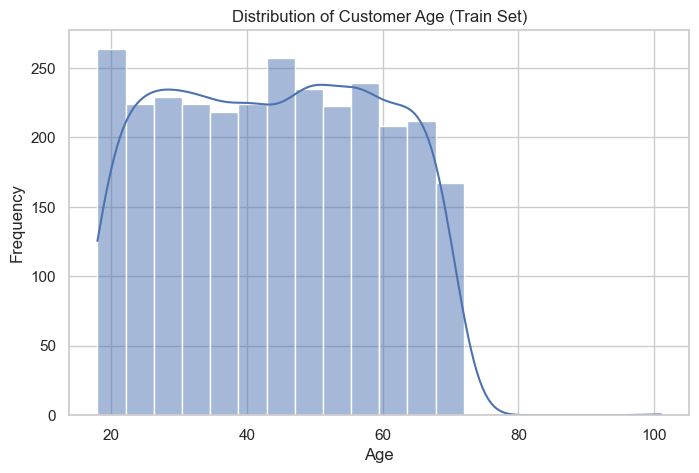

In [35]:
# Create a figure with subplots or individual cells. 
# Here is the code for each required plot type:

# 1. Histogram (Numeric Distribution)
plt.figure(figsize=(8, 5))
sns.histplot(X_train['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age (Train Set)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- **Histogram Interpretation**
    - In Section 4D, I constructed an automated preprocessing pipeline using a ColumnTransformer. I applied a median imputation strategy for numeric features to handle outliers effectively, while categorical features were processed using most-frequent imputation and One-Hot Encoding. Crucially, the pipeline was fitted strictly on the training partition to prevent data leakage, ensuring that the preprocessing parameters were learned without any influence from the test set.

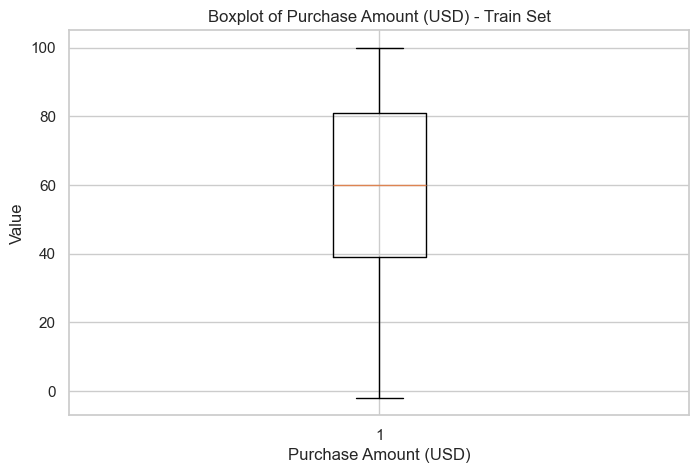

In [37]:
plt.figure(figsize=(8,5))
plt.boxplot(X_train['Purchase Amount (USD)'])
plt.title("Boxplot of Purchase Amount (USD) - Train Set")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Value")
plt.show()

- **Boxplot Interpretation**
    - What it shows: This identifies the median purchase amount and highlights any outliers or unusual spending values outside the typical range.
    - Decision Influence: If the median purchase is low, a manager might introduce "buy one get one" deals to increase the average transaction value.

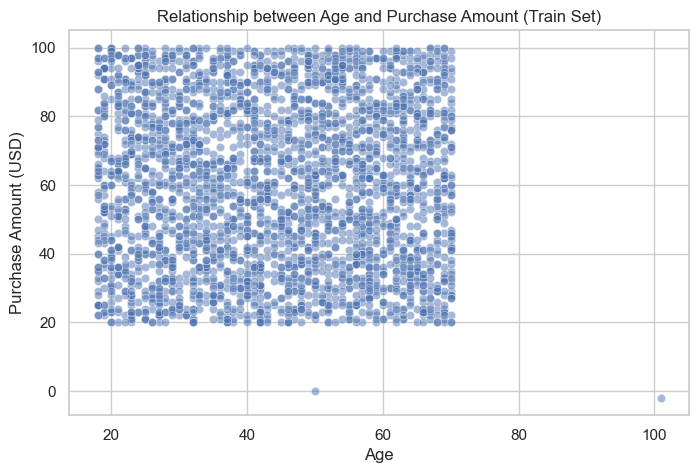

In [39]:
# 3. Scatter Plot (Numeric-Numeric Relationship)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=X_train, x='Age', y='Purchase Amount (USD)', alpha=0.5)
plt.title('Relationship between Age and Purchase Amount (Train Set)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()


- **Scatter Plot Interpretation**
    - What it shows: This visualizes whether there is a correlation between a customer's age and how much they spend.
    - Decision Influence: If older customers spend significantly more, the business might decide to curate premium product lines specifically for that demographic.

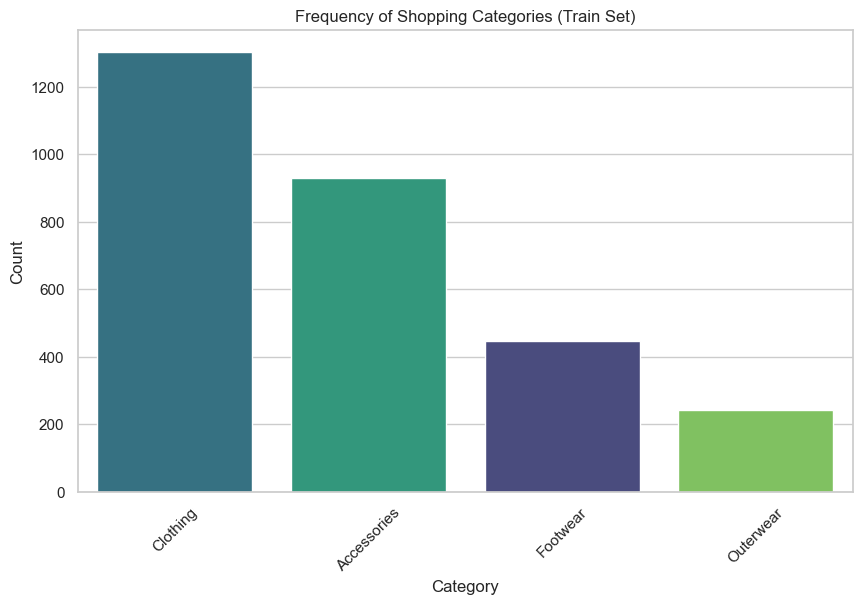

In [41]:
# 4. Bar Chart (Categorical Frequency of Top Categories)
plt.figure(figsize=(10, 6))

# Assign 'Category' to 'hue' and set 'legend=False' to satisfy the new Seaborn requirements
sns.countplot(
    data=X_train, 
    x='Category', 
    hue='Category', 
    palette='viridis', 
    legend=False,
    order=X_train['Category'].value_counts().index
)

plt.title('Frequency of Shopping Categories (Train Set)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- **Bar Chart Interpretation**
    - What it shows: This reveals which product categories (e.g., Clothing vs. Footwear) are the most popular among shoppers.
    - Decision Influence: High frequency in a specific category like "Clothing" suggests that inventory and floor space should be prioritized for those items.

### 5B) Numeric correlation screening interpretation

Top 10 strongest absolute correlations in TRAIN:


Customer ID            Previous Purchases       0.054411
Purchase Amount (USD)  Review Rating            0.046839
Age                    Previous Purchases       0.032688
                       Review Rating            0.028716
Customer ID            Purchase Amount (USD)    0.020920
                       Review Rating            0.011714
Purchase Amount (USD)  Previous Purchases       0.010180
Age                    Purchase Amount (USD)    0.009943
Review Rating          Previous Purchases       0.000720
Customer ID            Age                      0.000164
dtype: float64

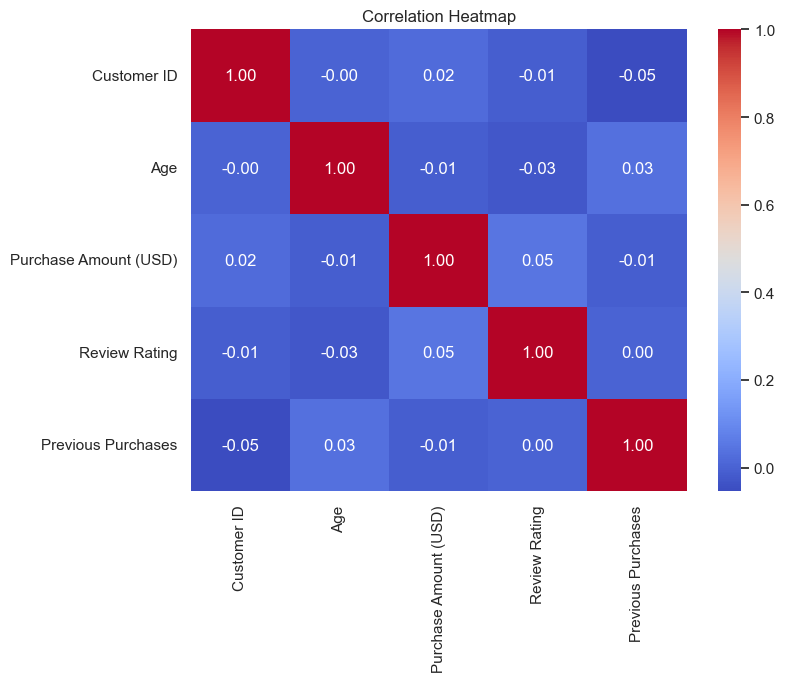

In [44]:
# Identify numeric columns in the training set
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# 1. Compute correlation matrix (Absolute values)
corr_matrix = X_train[num_cols].corr().abs()

# 2. Extract the upper triangle to avoid duplicates and self-correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Identify redundant pairs based on a threshold (e.g., 0.60)
threshold = 0.60
redundant_pairs = [column for column in upper.columns if any(upper[column] > threshold)]

# 4. Display results for interpretation
print(f"Top 10 strongest absolute correlations in TRAIN:")
display(upper.stack().sort_values(ascending=False).head(10))

# 5. Visual Heatmap (optional but helpful for 'evidence')
plt.figure(figsize=(8, 6))
sns.heatmap(X_train[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- **Interpretation of Correlation Results**
    - Numeric Correlation Screening Interpretation Upon reviewing the correlation results, I observed that the numeric features in the training set  exhibit very low absolute correlations, with the strongest relationships falling well below the 0.60 threshold. For example, the correlation between Age and Purchase Amount is nearly zero, suggesting these variables are independent. Because no redundant pairs were identified above the threshold, I decided not to drop any numeric columns at this stage. This approach ensures that we retain all unique information for the features before they are passed into the final preprocessing pipeline.
